In [1]:
import torch
import numpy as np

import h5py
import matplotlib.pyplot as plt

In [2]:
def normalized_rmse(predictions, true_values):
  """
  Calculates the Normalized Root Mean Squared Error (nRMSE).

  Args:
    predictions: A array containing the predicted values.
    true_values: A array containing the true values.

  Returns:
    The normalized root mean squared error.
  """
  #print(predictions.shape, true_values.shape)

  rmse = torch.sqrt(torch.mean((predictions - true_values) ** 2, dim = 1 ) )

  nrmse = rmse /   torch.sqrt(torch.mean((true_values) ** 2, dim = 1) )    #torch.std(true_values)
  #return torch.mean(nrmse)
  return nrmse

In [3]:
def analyze_result(file_loc):
    res = torch.load(file_loc, map_location="cpu")
    try:
        prediction_B1_cons = res["train_cons_ro_250"][1]
        actual_B1_cons = res["train_cons_ro_250"][2]
        #print( res["test_cons_ro_250"][3][0])
        nrmse_cons = normalized_rmse(prediction_B1_cons, actual_B1_cons)
        train_cons = [nrmse_cons, prediction_B1_cons, actual_B1_cons]
    except:
        train_cons = [0,0,0]
    try:
        prediction_B1_cons = res["test_cons_ro_250"][1]
        actual_B1_cons = res["test_cons_ro_250"][2]
        #print( res["test_cons_ro_250"][3][0])
        nrmse_cons = normalized_rmse(prediction_B1_cons, actual_B1_cons)
        cons = [nrmse_cons, prediction_B1_cons, actual_B1_cons]
    except:
        cons = [0,0,0]
    try:
        prediction_B1_var = res["test_var_ro_250"][1]
        actual_B1_var = res["test_var_ro_250"][2]
        #print( res["test_var_ro_250"][3][0])
        nrmse_var = normalized_rmse(prediction_B1_var, actual_B1_var)
        var = [nrmse_var,prediction_B1_var, actual_B1_var]
    except:
        var = [0,0,0]
    
    return cons, var, train_cons
    

In [4]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2/run_2_result.pt"
test_cons = analyze_result(file_loc)

In [5]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_dim_64/run_2_dim_64_result_prior_dt1_3.pt"
test_cons_64 = analyze_result(file_loc)

In [7]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_train_time_100_1/run_2_train_time_100_1_result.pt"
test_cons_t_100 = analyze_result(file_loc)

In [6]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3_second.pt"
test_var = analyze_result(file_loc)

In [8]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200/run_6_iteration_200_result_prior_dt1_3.pt"
test_var_i_200 = analyze_result(file_loc)

In [9]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_continue/run_6_iteration_200_continue_result_prior_dt1_3.pt"
test_var_i_200 = analyze_result(file_loc)

In [10]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_64_continue/run_6_iteration_200_dim_64_continue_result_prior_dt1_3.pt"
test_var_i_200_64 = analyze_result(file_loc)

In [ ]:
on/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_64_continue/run_6_iteration_200_dim_64_continue_result_prior_dt1_3.pt"
test_var_i_200_64 = analyze_result(file_loc)

In [11]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_train_time_100/run_6_train_time_100_result_prior_dt1_3_second.pt"
test_var_t_100 = analyze_result(file_loc)

In [12]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_train_time_100_dt/run_6_train_time_100_dt_result_prior_dt1_3.pt"
test_var_t_100_dt = analyze_result(file_loc)

In [13]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_time_100_dt_iteration_200/run_6_time_100_dt_iteration_200_result_prior_dt1_3.pt"
test_var_t_100_iter_200_dt = analyze_result(file_loc)

In [37]:
test_var_i_200_c[0][1].shape

torch.Size([128, 256, 191])

In [38]:
test_var_i_200_c[1][1].shape

torch.Size([128, 256, 90])

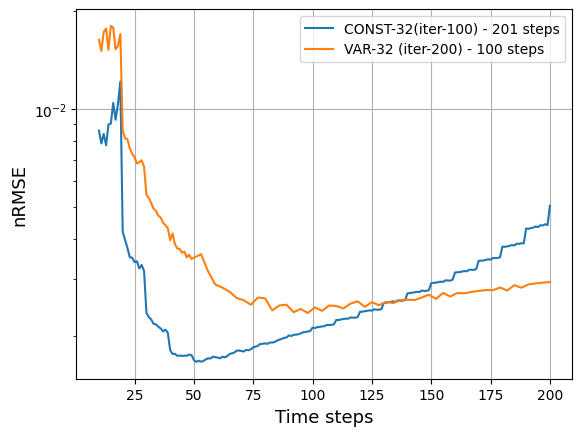

In [14]:
plt.plot(torch.arange(10,201), torch.mean(test_cons[0][0], dim=0), label = "CONST-32(iter-100) - 201 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_i_200[1][0], dim=0), label = "VAR-32 (iter-200) - 100 steps")

#plt.plot(torch.arange(10,201), torch.mean(test_cons_64[0][0], dim=0), label = "CONST-64 (iter-100) - 201 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_i_200_64[1][0], dim=0), label = "VAR-dim-64 (iter-200) - 100 steps")
plt.legend()
plt.yscale("log")
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [4]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2/run_2_result.pt"
test_cons_iter_100 = analyze_result(file_loc)

In [5]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_200/run_2_iteration_200_result_prior_dt1_3.pt"
test_cons_iter_200 = analyze_result(file_loc)

In [6]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_5_horizon_3/iteration_200_dim_32_ms_5/iteration_200_dim_32_ms_5_result_prior_dt1_3_1.pt"
test_cons_iter_200_ms_5 = analyze_result(file_loc)

In [7]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_400_dim_32/run_2_iteration_400_dim_32_result_prior_dt1_3_1.pt"
test_cons_iter_400 = analyze_result(file_loc)

In [8]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3_second.pt"
#file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_100/run_6_iteration_100_result_prior_dt1_3.pt"
test_var_iter_100_T = analyze_result(file_loc)

In [9]:
#file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3_second.pt"
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_100/run_6_iteration_100_result_prior_dt1_3.pt"
test_var_iter_100_dt = analyze_result(file_loc)

In [10]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_continue/run_6_iteration_200_continue_result_prior_dt1_3.pt"
test_var_iter_200 = analyze_result(file_loc)

In [11]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_32_ms_5/run_6_iteration_200_dim_32_ms_5_result_prior_dt1_3_1.pt"
#file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_32_ms_5_continue/run_6_iteration_200_dim_32_ms_5_continue_result_prior.pt"
test_var_iter_200_ms_5= analyze_result(file_loc)

In [12]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_32_ms_5_continue/run_6_iteration_200_dim_32_ms_5_continue_result_prior.pt"
test_var_iter_200_ms_5_= analyze_result(file_loc)

In [13]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_400_dim_32/run_6_iteration_400_dim_32_result_prior_dt1_3_1.pt"
test_var_iter_400 = analyze_result(file_loc)

In [14]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_400_dim_64/run_6_iteration_400_dim_64_result_prior_dt1_3_1.pt"
test_var_iter_400_dim_64 = analyze_result(file_loc)

In [15]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_T/run_6_iteration_200_T_result_prior_dt1_3_1.pt"
test_var_iter_200_T = analyze_result(file_loc)

In [16]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_T/run_6_iteration_200_T_result_prior_dt1_3_1.pt"
test_var_iter_200_T = analyze_result(file_loc)

In [36]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_200/run_2_iteration_200_result_.pt"
test_var_iter_200 = analyze_result(file_loc)

In [37]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_200_curriculum/run_2_iteration_200_curriculum_result_prior.pt"
test_var_iter_200_cur = analyze_result(file_loc)

In [14]:
file_loc = "/nobackup/scoc/variable_autoregression/result/E1/constant_time/dt_1_ms_10_horizon_3/run_6_iteration_200/run_6_iteration_200_result_.pt"
test_var_iter_200_e1 = analyze_result(file_loc)

In [15]:
file_loc = "/nobackup/scoc/variable_autoregression/result/E1/constant_time/dt_1_ms_10_horizon_3/run_6_iteration_200_curriculum/run_6_iteration_200_curriculum_result_.pt"
test_var_iter_200_cur_e1 = analyze_result(file_loc)

In [26]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_10_horizon_3/run_6_iteration_200/run_6_iteration_200_result_.pt"
test_var_iter_200_a1 = analyze_result(file_loc)

In [34]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/sequential_curriculum/run_4/run_4_result_.pt"
test_var_iter_seq_cur_200_b1 = analyze_result(file_loc)

In [27]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_10_horizon_3/run_6_iteration_200_curriculum/run_6_iteration_200_curriculum_result_.pt"
test_var_iter_200_cur_a1 = analyze_result(file_loc)

In [18]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_5_horizon_3/run_6_iteration_200_curriculum_1/run_6_iteration_200_curriculum_1_result_.pt"
test_var_iter_200_cur_a1_ = analyze_result(file_loc)

In [22]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/sequential_curriculum/run_4/run_4_result_.pt"
test_var_iter_200_seq_cur_a1_ = analyze_result(file_loc)

In [6]:
test_var_iter_200[0][0].shape

torch.Size([128, 191])

In [9]:
test_var_iter_200[-1][0].shape

torch.Size([2048, 191])

In [14]:
test_var_iter_200[0][0].shape

torch.Size([128, 191])

In [30]:
test_var_iter_200_e1[0][0]

0

In [61]:
torch.mean(test_var_iter_200_e1[0][0])

tensor(0.2258)

In [8]:
torch.mean(test_var_iter_200_cur_a1[0][0])

tensor(1.9390e+10)

In [7]:
torch.mean(test_var_iter_200_cur_a1_[0][0])

tensor(5.5470)

In [72]:
torch.mean(test_var_iter_200_cur_a1[0][0], dim = -1)

tensor([2.2143e-03, 5.5172e-03, 3.2838e-03, 5.8656e-03, 3.3269e-03, 4.2442e-03,
        4.0121e-03, 5.3990e-03, 1.2190e-02, 6.6947e-03, 5.1078e-03, 2.4529e-03,
        4.3914e-03, 4.3339e-03, 2.2478e+01, 6.1030e+05, 6.6216e-03, 6.1758e-03,
        1.2154e+04, 4.8313e-03, 5.8262e-01, 5.9936e-03, 9.0503e-03, 5.4495e-03,
        5.1252e-03, 8.7117e-03, 7.4128e-03, 2.4809e+12, 3.2450e-03, 3.4258e+02,
        6.5080e-03, 5.2786e+01, 2.8871e-03, 1.2806e-02, 8.1709e-03, 9.2541e-01,
        5.9861e-03, 2.2811e-03, 3.8722e-03, 5.3002e+03, 1.2795e-02, 9.1100e+08,
        4.0856e-03, 3.2727e-03, 2.2599e-03, 3.5074e-03, 3.0904e-03, 1.6239e-01,
        2.8254e-03, 2.2846e-03, 3.6009e-03, 2.9802e-03, 6.0907e-03, 3.1957e-03,
        5.6160e-03, 3.1341e-03, 2.3721e-03, 2.9896e+04, 3.2820e-03, 6.5780e-03,
        5.2281e-03, 4.0705e-03, 2.3765e-03, 7.9135e-03, 3.9481e-03, 3.7782e-03,
        4.4091e-03, 3.8064e+07, 8.1997e-03, 7.0117e-03, 3.1637e-03, 5.6460e-03,
        2.7839e-03, 4.9158e-03, 2.6840e-

In [13]:
torch.cat((test_var_iter_200_cur_a1_[0][0][:117], test_var_iter_200_cur_a1_[0][0][118:]), dim=0).shape

torch.Size([127, 196])

In [10]:
torch.where(test_var_iter_200_cur_a1_[0][0]> 10)

(tensor([117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117,
         117, 117, 117, 117, 117, 117, 117]),
 tensor([175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
         189, 190, 191, 192, 193, 194, 195]))

In [ ]:
torch.mean(test_var_iter_200_cur_a1_[0][0],)

tensor(5.5470)

In [ ]:
plt.plot(torch.arange(128), torch.mean(test_var_iter_200_cur_a1[0][0], dim = -1), "*")
plt.yscale("log")

In [ ]:
plt.plot(torch.arange(128), torch.mean(test_var_iter_200_cur_a1_[0][0], dim = -1), "*")
plt.yscale("log")

In [24]:
test_var_iter_200_seq_cur_a1_[0][0].shape

torch.Size([128, 191])

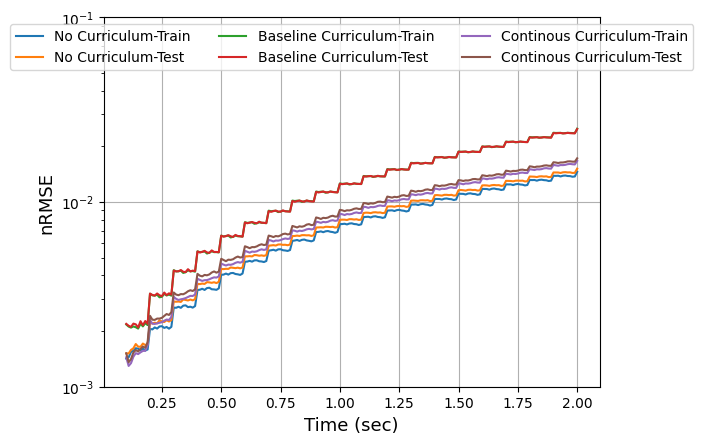

In [38]:
timess = torch.arange(10,201)*0.01
plt.plot(timess, torch.mean(test_var_iter_200_a1[-1][0], dim=0), label = "No Curriculum-Train")
plt.plot(timess, torch.mean(test_var_iter_200_a1[0][0], dim=0), label = "No Curriculum-Test")

plt.plot(timess, torch.mean(test_var_iter_200_seq_cur_a1_[-1][0], dim=0), label = "Baseline Curriculum-Train")
plt.plot(timess, torch.mean(test_var_iter_200_seq_cur_a1_[0][0], dim=0), label = "Baseline Curriculum-Test")

plt.plot(timess, torch.mean(test_var_iter_200_cur_a1[-1][0], dim=0), label = "Continous Curriculum-Train")
plt.plot(timess, torch.mean(test_var_iter_200_cur_a1[0][0], dim=0), label = "Continous Curriculum-Test")
#plt.plot(timess, torch.mean(torch.cat((test_var_iter_200_cur_a1[0][0][:117], test_var_iter_200_cur_a1_[0][0][118:]), dim=0), dim=0), label = "Continous Curriculum-Test")
#timess = torch.arange(10,201)*0.01
#plt.plot(timess, torch.mean(test_var_iter_200_seq_cur_a1_[0][0], dim=0), label = "Sequence Continous Curriculum-Train")
#test_var_iter_200_seq_cur_a1_
plt.legend(ncol=3, loc="upper center")  # Set the number of columns to 3

plt.yscale("log")
plt.ylim([0.001, 0.1])
plt.xlabel("Time (sec)", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")

plt.grid()

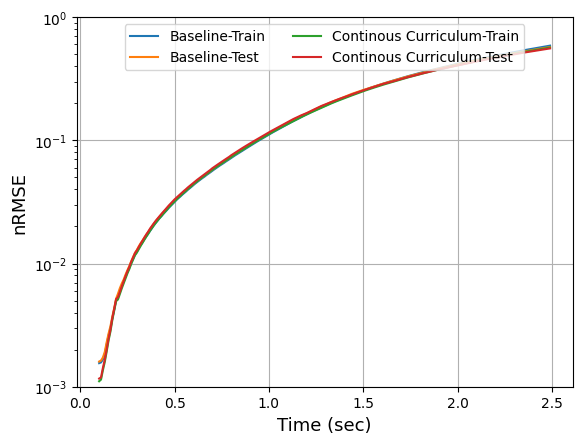

In [45]:
timess = torch.arange(10,250)*0.01
plt.plot(timess, torch.mean(test_var_iter_200_e1[-1][0], dim=0), label = "Baseline-Train")
plt.plot(timess, torch.mean(test_var_iter_200_e1[0][0], dim=0), label = "Baseline-Test")
plt.plot(timess, torch.mean(test_var_iter_200_cur_e1[-1][0], dim=0), label = "Continous Curriculum-Train")
plt.plot(timess, torch.mean(test_var_iter_200_cur_e1[0][0], dim=0), label = "Continous Curriculum-Test")

plt.legend(ncol=2, loc="upper center")  # Set the number of columns to 3

plt.yscale("log")
plt.ylim([0.001, 1])
plt.xlabel("Time (sec)", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")

plt.grid()

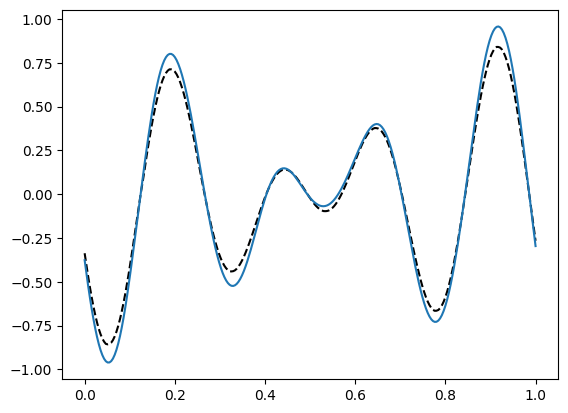

In [10]:
#test_var_iter_200_e1[-1][-1].shape

#plt.plot(torch.linspace(0,1,200), test_var_iter_200_e1[-1][1][95, :, -1] )
plt.plot(torch.linspace(0,1,256), test_var_iter_200_seq_cur_a1_[-1][2][20, :, 20], "k--")
plt.plot(torch.linspace(0,1,256), test_var_iter_200_seq_cur_a1_[-1][1][20, :, 20] )

In [43]:
torch.mean(test_var_iter_200[0][0])

tensor(0.0034)

In [44]:
torch.mean(test_var_iter_seq_cur_200_b1[0][0])

tensor(0.0112)

In [45]:
torch.mean(test_var_iter_200_cur[0][0])

tensor(0.0019)

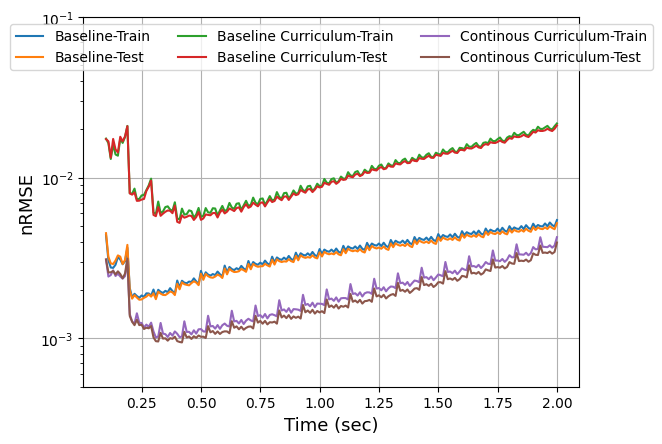

In [41]:
timess = torch.arange(10,201)*0.01
plt.plot(timess, torch.mean(test_var_iter_200[-1][0], dim=0), label = "Baseline-Train")
plt.plot(timess, torch.mean(test_var_iter_200[0][0], dim=0), label = "Baseline-Test")
plt.plot(timess, torch.mean(test_var_iter_seq_cur_200_b1[-1][0], dim=0), label = "Baseline Curriculum-Train")
plt.plot(timess, torch.mean(test_var_iter_seq_cur_200_b1[0][0], dim=0), label = "Baseline Curriculum-Test")
plt.plot(timess, torch.mean(test_var_iter_200_cur[-1][0], dim=0), label = "Continous Curriculum-Train")
plt.plot(timess, torch.mean(test_var_iter_200_cur[0][0], dim=0), label = "Continous Curriculum-Test")

plt.legend(ncol=3, loc="upper center")  # Set the number of columns to 3

plt.yscale("log")
plt.ylim([0.0005, 0.1])
plt.xlabel("Time (sec)", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")

plt.grid()

In [50]:
torch.mean(test_cons_iter_200[0][0][...,-1:])

tensor(0.0035)

In [11]:
test_cons_iter_200[0][0].shape

torch.Size([128, 191])

In [4]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_32_ms_5_continue_1/errors.pt"
error = torch.load(file_loc, map_location="cpu")

In [ ]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_32_ms_5_continue_1/errors.pt"
error = torch.load(file_loc, map_location="cpu")

In [6]:
error.shape

torch.Size([70, 10])

In [13]:
error[:,3]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0217, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0087, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0074, 0.0000, 0.0000, 0.0000, 0.0000, 0.0077, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0045, 0.0000, 0.0000, 0.0000, 0.0000, 0.0030, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0041, 0.0000, 0.0000, 0.0000, 0.0000, 0.0026,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0027, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0022, 0.0000, 0.0000, 0.0000, 0.0000, 0.0022, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0020, 0.0000, 0.0000, 0.0000, 0.0000, 0.0020])

In [19]:
error[4:,3][::5]

tensor([0.0217, 0.0078, 0.0087, 0.0074, 0.0077, 0.0045, 0.0030, 0.0041, 0.0026,
        0.0027, 0.0022, 0.0022, 0.0020, 0.0020])

In [21]:
def find_indices(A, B):
    indices = torch.zeros_like(A, dtype=torch.long) - 1  # Initialize with -1 (not found)

    for i, element in enumerate(A):
        match = (B == element).nonzero(as_tuple=True)[0] #find the index of all matches, and take the first one.

        if len(match) > 0:
            indices[i] = match[0]

    return indices
find_indices(error[4:,3][::5], error[:,3])

tensor([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69])

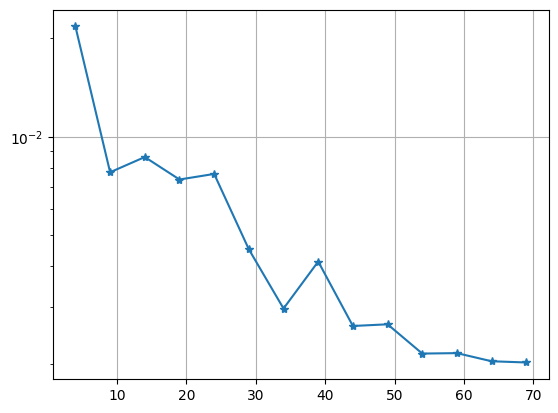

In [27]:
plt.plot(find_indices(error[4:,3][::5], error[:,3]), error[4:,3][::5], "-*")
plt.grid()
plt.yscale("log")

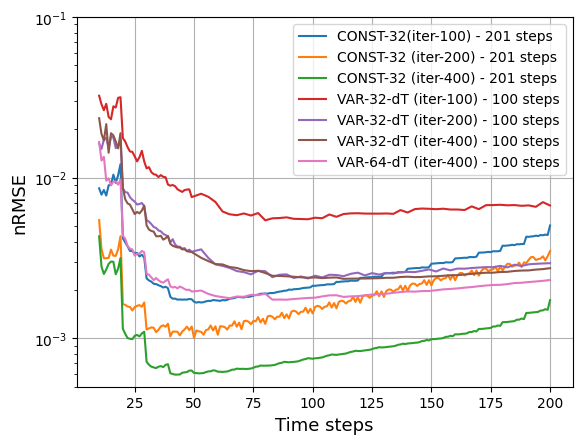

In [22]:
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_100[0][0], dim=0), label = "CONST-32(iter-100) - 201 steps")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200[0][0], dim=0), label = "CONST-32 (iter-200) - 201 steps")
#plt.plot(torch.arange(5,201), torch.mean(test_cons_iter_200_ms_5[0][0], dim=0), label = "CONST-ms-5(iter-200) - 201 steps")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_400[0][0], dim=0), label = "CONST-32 (iter-400) - 201 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_100_T[1][0], dim=0), label = "VAR-32-T (iter-100) - 100 steps")

plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_100_dt[1][0], dim=0), label = "VAR-32-dT (iter-100) - 100 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_T[1][0], dim=0), label = "VAR-32-T (iter-200) - 100 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200[1][0], dim=0), label = "VAR-32-dT (iter-200) - 100 steps")
# plt.plot(torch.cat((torch.arange(5,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_ms_5[1][0], dim=0), label = "VAR-ms-5-dT (iter-200) - 100 steps")
# plt.plot(torch.cat((torch.arange(5,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_ms_5_[1][0], dim=0), label = "VAR-ms-5---dT (iter-200) - 100 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_400[1][0], dim=0), label = "VAR-32-dT (iter-400) - 100 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_400_dim_64[1][0], dim=0), label = "VAR-64-dT (iter-400) - 100 steps")


plt.legend()
plt.yscale("log")
plt.ylim([0.0005, 0.1])
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [28]:
torch.mean(test_cons_iter_200_ms_5[0][0], dim=0)[-1]

tensor(0.0082)

In [26]:
torch.mean(test_var_iter_200_ms_5_[1][0], dim=0)[-1]

tensor(0.0176)

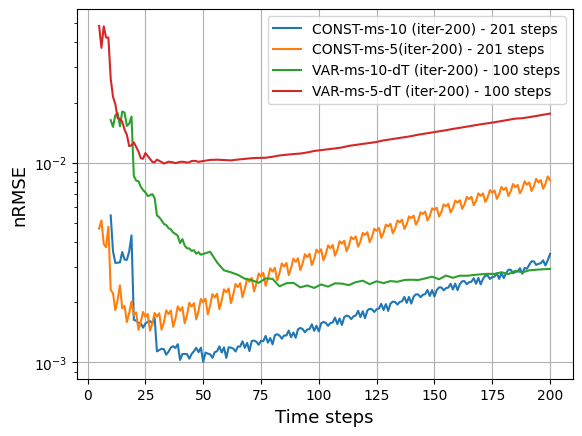

In [25]:
#plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_100[0][0], dim=0), label = "CONST-32(iter-100) - 201 steps")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200[0][0], dim=0), label = "CONST-ms-10 (iter-200) - 201 steps")
plt.plot(torch.arange(5,201), torch.mean(test_cons_iter_200_ms_5[0][0], dim=0), label = "CONST-ms-5(iter-200) - 201 steps")
#plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_400[0][0], dim=0), label = "CONST-32 (iter-400) - 201 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_100_T[1][0], dim=0), label = "VAR-32-T (iter-100) - 100 steps")

#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_100_dt[1][0], dim=0), label = "VAR-32-dT (iter-100) - 100 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_T[1][0], dim=0), label = "VAR-32-T (iter-200) - 100 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200[1][0], dim=0), label = "VAR-ms-10-dT (iter-200) - 100 steps")
#plt.plot(torch.cat((torch.arange(5,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_ms_5[1][0], dim=0), label = "VAR-ms-5-dT (iter-200) - 100 steps")
plt.plot(torch.cat((torch.arange(5,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_ms_5_[1][0], dim=0), label = "VAR-ms-5-dT (iter-200) - 100 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_400[1][0], dim=0), label = "VAR-32-dT (iter-400) - 100 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_400_dim_64[1][0], dim=0), label = "VAR-64-dT (iter-400) - 100 steps")


plt.legend()
plt.yscale("log")
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [27]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200_dim_64_continue/run_6_iteration_200_dim_64_continue_result_prior_dt1_3.pt"
test_var_iter_200_dim_64 = analyze_result(file_loc)

In [36]:
#file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_dim_64/run_2_dim_64_result_prior_dt1_3.pt"
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_dim_64/run_2_dim_64_result_prior_dt1_3_1.pt"
test_cons_iter_100_dim_64 = analyze_result(file_loc)

In [37]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_200_dim_64/run_2_iteration_200_dim_64_result_prior_dt1_3_1.pt"
test_cons_iter_200_dim_64 = analyze_result(file_loc)

In [32]:
test_cons_iter_200_dim_64[2][0].shape

torch.Size([2048, 191])

In [34]:
test_cons_iter_100_dim_64[2][0]

0

In [33]:
torch.mean(test_cons_iter_100_dim_64[2][0], dim=0)

TypeError: mean() received an invalid combination of arguments - got (int, dim=int), but expected one of:
 * (Tensor input, *, torch.dtype dtype)
 * (Tensor input, tuple of ints dim, bool keepdim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of names dim, bool keepdim, *, torch.dtype dtype, Tensor out)


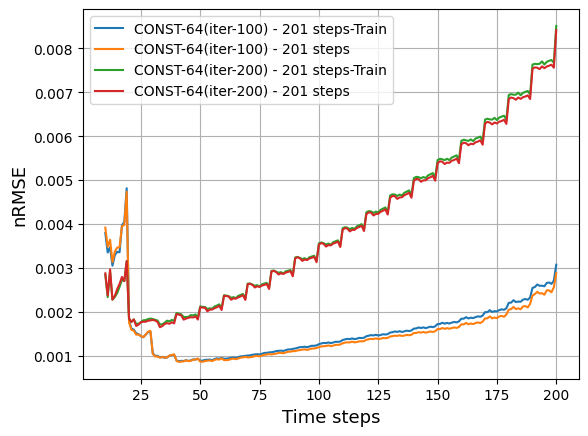

In [40]:
# plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_100[0][0], dim=0), label = "CONST-32(iter-100) - 201 steps")
# plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200[0][0], dim=0), label = "CONST-32(iter-200) - 201 steps")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_100_dim_64[2][0], dim=0), label = "CONST-64(iter-100) - 201 steps-Train")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_100_dim_64[0][0], dim=0), label = "CONST-64(iter-100) - 201 steps")


plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200_dim_64[2][0], dim=0), label = "CONST-64(iter-200) - 201 steps-Train")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200_dim_64[0][0], dim=0), label = "CONST-64(iter-200) - 201 steps")

#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200[1][0], dim=0), label = "VAR-32 (iter-200) - 100 steps")
#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_dim_64[1][0], dim=0), label = "VAR-64 (iter-200) - 100 steps")

# plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200[0][0], dim=0), label = "CONST-32 (iter-200) - 201 steps")
# plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200[1][0], dim=0), label = "VAR-32 (iter-200) - 100 steps")
# plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_i_200_64[1][0], dim=0), label = "VAR-dim-64 (iter-200) - 100 steps")
plt.legend()
#plt.yscale("log")
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

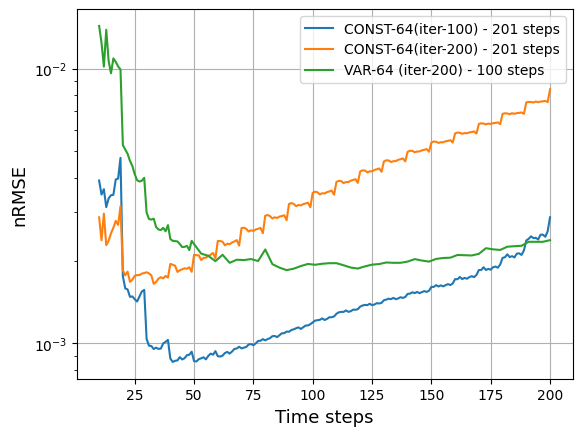

In [41]:
# plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_100[0][0], dim=0), label = "CONST-32(iter-100) - 201 steps")
# plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200[0][0], dim=0), label = "CONST-32(iter-200) - 201 steps")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_100_dim_64[0][0], dim=0), label = "CONST-64(iter-100) - 201 steps")
plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200_dim_64[0][0], dim=0), label = "CONST-64(iter-200) - 201 steps")

#plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200[1][0], dim=0), label = "VAR-32 (iter-200) - 100 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_dim_64[1][0], dim=0), label = "VAR-64 (iter-200) - 100 steps")

# plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200[0][0], dim=0), label = "CONST-32 (iter-200) - 201 steps")
# plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200[1][0], dim=0), label = "VAR-32 (iter-200) - 100 steps")
# plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_i_200_64[1][0], dim=0), label = "VAR-dim-64 (iter-200) - 100 steps")
plt.legend()
plt.yscale("log")
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [24]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_100_dim_64_train_100/run_6_iteration_100_dim_64_train_100_result_prior_dt1_3_1.pt"
test_var_iter_100_dim_64_t_100 = analyze_result(file_loc)

In [30]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_time_100_dt_iteration_200/run_6_time_100_dt_iteration_200_result_prior_dt1_3.pt"
test_var_iter_200_dim_32_t_100 = analyze_result(file_loc)

In [27]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_200_dim_32_time_range_100/run_2_iteration_200_dim_32_time_range_100_result_prior_dt1_3_1.pt"
test_cons_iter_200_dim_32_t_100 = analyze_result(file_loc)

In [32]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_train_time_100_1/run_2_train_time_100_1_result_prior_dt1_3_second.pt"
test_cons_iter_200_dim_32_t_100_ = analyze_result(file_loc)

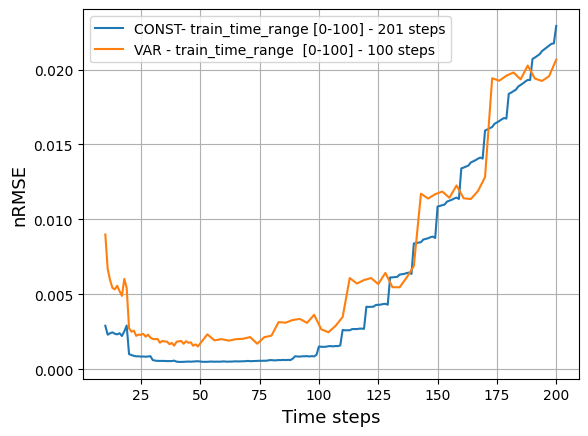

In [35]:

plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200_dim_32_t_100[0][0], dim=0), label = "CONST- train_time_range [0-100] - 201 steps")
#plt.plot(torch.arange(10,201), torch.mean(test_cons_iter_200_dim_32_t_100_[0][0], dim=0), label = "CONST1- train_time_range - 201 steps")


# plt.plot(torch.arange(10,201), torch.mean(test_var[0][0], dim=0), label = "VAR (iter-100) - 201 steps")
# plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var[1][0], dim=0), label = "VAR (iter-100) - 100 steps")

#plt.plot(torch.arange(10,201), torch.mean(test_var_iter_200_dim_32_t_100[0][0], dim=0), label = "VAR - train_time_range - 201 steps")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_iter_200_dim_32_t_100[1][0], dim=0), label = "VAR - train_time_range  [0-100] - 100 steps")

# plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var[1][0], dim=0), label = "VAR-train_time_range= [0, 100] dt - 100 steps")
# plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(test_var_i_200[1][0], dim=0), label = "VAR_i_200-train_time_range= [0, 200] dt - 100 steps")

#plt.plot(torch.arange(10,201), torch.mean(test_var_i_200[0][0], dim=0), label = "VAR (iter-200) - 201 steps")

plt.legend()
#plt.yscale("log")
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [26]:
test_var_t_100_iter_200_dt[1][1].shape

torch.Size([128, 256, 90])

In [28]:
test_var_t_100_iter_200_dt[0][1].shape

torch.Size([128, 256, 191])

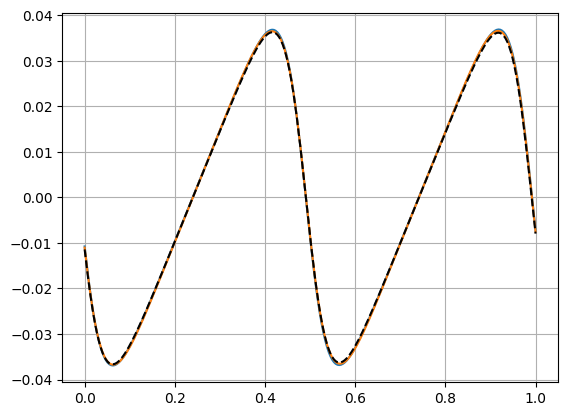

In [29]:
samp = 10
times = [-1]
for time in times:
    plt.plot(torch.linspace(0,1,256), test_var_t_100_iter_200_dt[0][1][samp,:,time])
    plt.plot(torch.linspace(0,1,256), test_var_t_100_iter_200_dt[1][1][samp,:,time])
    plt.plot(torch.linspace(0,1,256), test_var_t_100_iter_200_dt[0][2][samp,:,time], "k--")
plt.grid()

In [ ]:
#file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3.pt"
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6/run_6_result_prior_dt1_3_second.pt"
test_var_prior_1_3 = torch.load(file_loc, map_location="cpu")
print(test_var_prior_1_3.keys())

dict_keys(['train_cons_oto_250', 'train_cons_ro_250', 'test_cons_oto_250', 'test_cons_ro_250', 'valid_cons_oto_250', 'valid_cons_ro_250', 'train_var_oto_250', 'train_var_ro_250', 'test_var_oto_250', 'test_var_ro_250', 'valid_var_oto_250', 'valid_var_ro_250'])


In [6]:
prediction_B1_var_prior_1_3 = test_var_prior_1_3["test_var_ro_250"][1]
actual_B1_var_prior_1_3 = test_var_prior_1_3["test_var_ro_250"][2]

In [7]:
prediction_B1_var_cons_prior_1_3 = test_var_prior_1_3["test_cons_ro_250"][1]
actual_B1_var_cons_prior_1_3 = test_var_prior_1_3["test_cons_ro_250"][2]

In [158]:
prediction_B1_var_cons_prior_1_3.shape

torch.Size([128, 256, 191])

In [136]:
test_var_prior_1_3["test_var_ro_250"][3][0]

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  53,  56,  59,  62,  65,  68,
         71,  74,  77,  80,  83,  86,  89,  92,  95,  98, 101, 104, 107, 110,
        113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152,
        155, 158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194,
        197, 200])

In [91]:
actual_B1_var_prior_1_3.shape

torch.Size([128, 256, 90])

In [77]:
actual_B1_cons.shape

torch.Size([128, 256, 191])

In [63]:
test_cons["test_cons_ro_250"][-1][0][10:]-10

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 1

In [62]:
test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  43,  46,
         49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,  88,
         91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130,
        133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172,
        175, 178, 181, 184, 187, 190])

In [138]:
array = test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10
array

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  43,  46,
         49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,  88,
         91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130,
        133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172,
        175, 178, 181, 184, 187, 190])

In [64]:
prediction_B1_cons.shape

torch.Size([128, 256, 191])

In [19]:
prediction_B1_cons_1 = prediction_B1_cons[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10]
actual_B1_cons_1 = actual_B1_cons[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10 ]

In [20]:
prediction_B1_var_cons_1 = prediction_B1_var_cons_prior_1_3[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10]
actual_B1_var_cons_1 = actual_B1_var_cons_prior_1_3[...,test_var_prior_1_3["test_var_ro_250"][-1][0][10:]-10 ]

In [142]:
actual_B1_cons_1.shape

torch.Size([128, 256, 90])

In [21]:
nrmse_cons = normalized_rmse(prediction_B1_cons_1, actual_B1_cons_1 )
nrmse_var = normalized_rmse(prediction_B1_var_prior_1_3, actual_B1_var_prior_1_3)
nrmse_var_cons = normalized_rmse(prediction_B1_var_cons_1, actual_B1_var_cons_1)

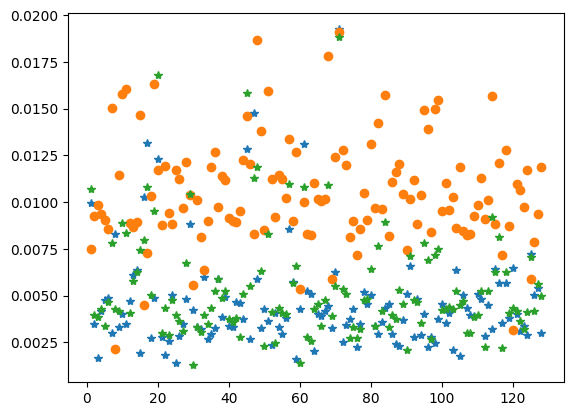

In [23]:
nrmse_var.shape

plt.plot(torch.arange(1,129), nrmse_var[:,-1], "*")
plt.plot(torch.arange(1,129), nrmse_var_cons[:,-1], "o")
plt.plot(torch.arange(1,129), nrmse_var_cons[:,-2], "*")

In [28]:
nrmse_var_cons.shape

torch.Size([128, 90])

In [29]:
prediction_B1_var_cons_1.shape

torch.Size([128, 256, 90])

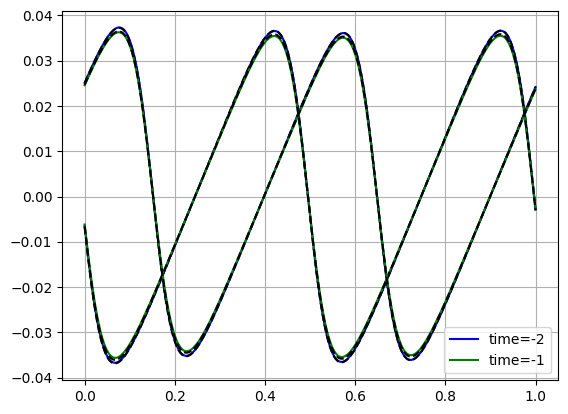

In [42]:
samp = 120
plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -2], "b", label="time=-2")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -2], "k--")

plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -1], "g", label="time=-1")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -1], "k--")

samp = 5
plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -2], "b")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -2], "k--")
plt.plot(torch.linspace(0,1,256), prediction_B1_var_cons_1[samp,:, -1], "g")
plt.plot(torch.linspace(0,1,256), actual_B1_var_cons_1[samp,:, -1], "k--")

plt.legend()
plt.grid()


In [43]:
torch.mean(nrmse_var)

tensor(0.0091)

In [44]:
torch.mean(nrmse_var_cons)

tensor(0.0097)

In [47]:
torch.mean(nrmse_var[:,-1])

tensor(0.0046)

In [48]:
torch.mean(nrmse_cons[:,-1])

tensor(0.0050)

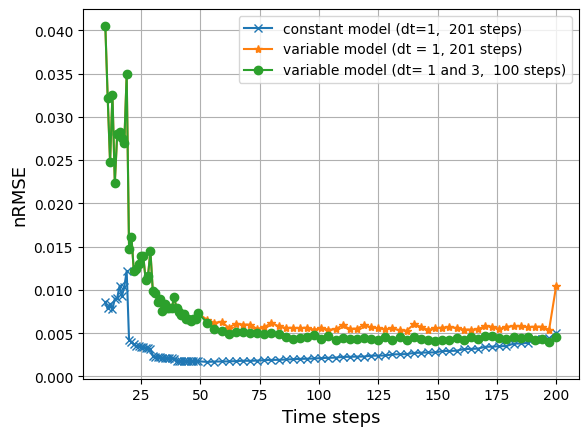

In [26]:
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_cons, dim=0), "-x", label = "constant model (dt=1,  201 steps)")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_var_cons, dim=0), "-*", label = "variable model (dt = 1, 201 steps)")
plt.plot(torch.cat((torch.arange(10,50,1), torch.arange(53,201,3))), torch.mean(nrmse_var, dim=0), "-o", label = "variable model (dt= 1 and 3,  100 steps)")
#plt.yscale("log")
plt.legend()
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [151]:
nrmse_cons.shape

torch.Size([128, 90])

In [152]:
nrmse_var.shape

torch.Size([128, 90])

In [105]:
data[1].shape

torch.Size([128, 256, 201])

In [110]:
actual_B1_var_prior_1_3.shape

torch.Size([128, 256, 90])

In [128]:
actual_B1_var_prior_1_3.shape

torch.Size([128, 256, 90])

In [140]:
torch.cat((torch.arange(10), torch.arange(10,50,1), torch.arange(53,201,3)))[10:]-10

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  43,  46,
         49,  52,  55,  58,  61,  64,  67,  70,  73,  76,  79,  82,  85,  88,
         91,  94,  97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130,
        133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172,
        175, 178, 181, 184, 187, 190])

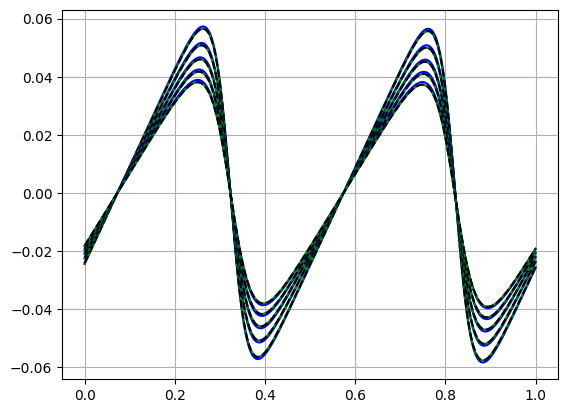

In [149]:
samp = 4
for i in range(70,90,4):
    #i = 10
    #plt.plot( torch.linspace(0,1,256), actual_B1_var_prior_1_3[samp,:,i], "g")
    
    plt.plot( torch.linspace(0,1,256), prediction_B1_cons_1[samp,:,i], "b")
    plt.plot( torch.linspace(0,1,256), prediction_B1_var_prior_1_3[samp,:,i], "g")
    #plt.plot( torch.linspace(0,1,256), data[1][i,:,0+10], "b")
    plt.plot( torch.linspace(0,1,256), actual_B1_cons_1[samp,:,i], "k--")

plt.grid()

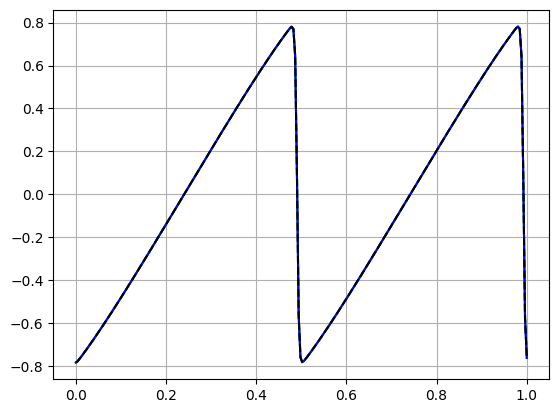

In [137]:
for i in range(0,90,):
    i = 10
    plt.plot( torch.linspace(0,1,256), actual_B1_var_prior_1_3[i,:,0], "g")
    #plt.plot( torch.linspace(0,1,256), data[1][i,:,0+10], "b")
    plt.plot( torch.linspace(0,1,256), actual_B1_cons[i,:,0], "k--")

plt.grid()

In [15]:
import numpy as np
import math

def rotate_vector(vector, axis, angle_degrees):
    """
    Rotates an N-dimensional vector around a given axis by a specified angle.

    Args:
        vector: A numpy array representing the N-dimensional vector.
        axis: A numpy array representing the axis of rotation (must be same dimension as vector).
        angle_degrees: The angle of rotation in degrees.

    Returns:
        A numpy array representing the rotated N-dimensional vector. Returns original vector on error.
    """

    try:
        n = len(vector)  # Get the dimension of the vector

        if len(axis) != n:
            raise ValueError("Vector and axis must have the same dimension.")

        axis = axis / np.linalg.norm(axis)  # Normalize the axis
        angle_rad = math.radians(angle_degrees)

        # Build the rotation matrix (Rodrigues' formula generalized to N-dimensions)
        rotation_matrix = np.eye(n) * math.cos(angle_rad)  # Initialize with cosine term
        rotation_matrix += np.outer(axis, axis) * (1 - math.cos(angle_rad)) # Add outer product term
        rotation_matrix += skew_symmetric(axis) * math.sin(angle_rad) # Add skew-symmetric term

        rotated_vector = np.dot(rotation_matrix, vector)
        return rotated_vector

    except Exception as e:
        print(f"Error during rotation: {e}")
        return vector

def skew_symmetric(v):
    """
    Creates a skew-symmetric matrix from a vector for cross-product calculations.
    """
    n = len(v)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                matrix[i, j] = v[(j+1)%n] if (i+1)%n == j else -v[(i+1)%n]
    return matrix

In [17]:

# Example usage (3D, 4D, and arbitrary N-dimensions):
vector_3d = np.array([1, 2, 3])
axis_3d = np.array([0, 0, 1])  # Z-axis
angle_3d = 5
rotated_vector_3d = rotate_vector(vector_3d, axis_3d, angle_3d)
print("3D Rotated Vector:", rotated_vector_3d)


3D Rotated Vector: [1.17050618 1.90523365 3.        ]


In [ ]:

vector_4d = np.array([1, 2, 3, 4])
axis_4d = np.array([1, 0, 0, 0])  # Example 4D axis
angle_4d = 90
rotated_vector_4d = rotate_vector(vector_4d, axis_4d, angle_4d)
print("4D Rotated Vector:", rotated_vector_4d)

# Example with N-dimensions (let's say 5)
N = 5
vector_nd = np.array([1] * N)  # Create a vector of ones
axis_nd = np.array([1, 1, 1, 1, 1]) # Example N-dimensional axis
angle_nd = 60
rotated_vector_nd = rotate_vector(vector_nd, axis_nd, angle_nd)
print(f"{N}D Rotated Vector:", rotated_vector_nd)

# Example of error handling (mismatched dimensions)
vector_error = np.array([1,2,3])
axis_error = np.array([1,2,3,4]) # Different dimension
angle_error = 45
rotated_vector_error = rotate_vector(vector_error, axis_error, angle_error)
print("Error Example:", rotated_vector_error) # Prints original vector and error message